# Display objects

A `striplog` depends on a hierarchy of objects. This notebook shows the objects related to display:

- [Decor](#Decor): One element from a legend — describes how to display a Rock.
- [Legend](#Legend): A set of Decors — describes how to display a set of Rocks or a Striplog.

<hr />

## Decor

In [1]:
from striplog import Decor

A Decor attaches a display style to a Rock. 

In [2]:
print(Decor.__doc__)


    A single display style. A Decor describes how to display a given set
    of Component properties.

    In general, you will not usually use a Decor on its own. Instead, you
    will want to use a Legend, which is just a list of Decors, and leave
    the Decors to the Legend.

    Args:
      params (dict): The parameters you want in the Decor. There must be a
        Component to attach the decoration to, and at least 1 other attribute.
        It's completely up to you, but you probably want at least a colour
        (hex names like #AAA or #d3d3d3, or matplotlib's English-language
        names listed at http://ageo.co/modelrcolour are acceptable.

        The only other parameter the class recognizes for now is 'width',
        which is the width of the striplog element.

    Example:
      my_rock = Component({ ... })
      d = {'component': my_rock, 'colour': 'red'}
      my_decor = Decor(d)
    


We are going to need a `Component` to make a `Decor`.

In [3]:
from striplog import Component
r = {'colour': 'grey',
     'grainsize': 'vf-f',
     'lithology': 'sand'}
rock = Component(r)
rock

grainsize,vf-f
colour,grey
lithology,sand


Like `Rock`s, we instantiate `Decor`s with a `dict` of properties:

In [4]:
d = {'color': '#86F0B6',
     'component': rock,
     'width': 3}
decor = Decor(d)
decor

Decor(width='3.0', colour='#86f0b6', component='"grainsize":"vf-f", "colour":"grey", "lithology":"sand"')

You can access its attributes. It has two ways to understand colour:

In [5]:
decor.colour

'#86f0b6'

In [6]:
decor.rgb

(134, 240, 182)

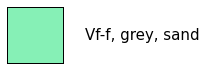

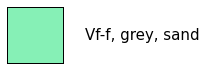

In [15]:
%matplotlib inline
decor.plot()

<hr />

## Legend

In [8]:
from striplog import Legend
print(Legend.__doc__)


    A look-up table to assist in the conversion of Components to
    a plot colour.

    Args:
        list_of_Decors (list): The decors to collect into a legend. In
            general, you will want to leave legend building to the constructor
            class methods, `Legend.default()`, and `Legend.from_csv(string)`.
            We can add others over time, such as `from_xls` and so on.
    


We'll define a legend in a CSV file. I can't think of a better way for now. It would be easy to make a web form to facilitate this with, for example, a colour picker. It may not be worth it, though; I imagine one would create one and then leave it alone most of the time. 

In [9]:
l = u"""colour, width, component lithology, component colour, component grainsize
#F7E9A6, 3, Sandstone, Grey, VF-F
#FF99CC, 2, Anhydrite, , 
#DBD6BC, 3, Heterolithic, Grey, 
#FF4C4A, 2, Volcanic, , 
#86F0B6, 5, Conglomerate, , 
#FF96F6, 2, Halite, , 
#F2FF42, 4, Sandstone, Grey, F-M
#DBC9BC, 3, Heterolithic, Red, 
#A68374, 2, Siltstone, Grey, 
#A657FA, 3, Dolomite, , 
#FFD073, 4, Sandstone, Red, C-M
#A6D1FF, 3, Limestone, , 
#FFDBBA, 3, Sandstone, Red, VF-F
#FFE040, 4, Sandstone, Grey, C-M
#A1655A, 2, Siltstone, Red, 
#363434, 1, Coal, , 
#664A4A, 1, Mudstone, Red, 
#666666, 1, Mudstone, Grey, """

In [10]:
legend = Legend.from_csv(l)
legend[:5]

Legend(colour='#f7e9a6', component='"colour":"grey", "grainsize":"vf-f", "lithology":"sandstone"', width='3.0'
colour='#ff99cc', component='"lithology":"anhydrite"', width='2.0'
colour='#dbd6bc', component='"colour":"grey", "lithology":"heterolithic"', width='3.0'
colour='#ff4c4a', component='"lithology":"volcanic"', width='2.0'
colour='#86f0b6', component='"lithology":"conglomerate"', width='5.0')

In [11]:
legend = Legend.default()
print(legend.to_csv())

colour,width,component grainsize,component colour,component lithology
#f7e9a6,3.0,vf-f,grey,sandstone,
#ff99cc,2.0,,,anhydrite,
#dbd6bc,3.0,,grey,heterolithic,
#ff4c4a,2.0,,,volcanic,
#86f0b6,5.0,,,conglomerate,
#ff96f6,2.0,,,halite,
#f2ff42,4.0,f-m,grey,sandstone,
#dbc9bc,3.0,,red,heterolithic,
#a68374,2.0,,grey,siltstone,
#a657fa,3.0,,,dolomite,
#ffd073,4.0,c-m,red,sandstone,
#a6d1ff,3.0,,,limestone,
#ffdbba,3.0,vf-f,red,sandstone,
#ffe040,4.0,c-m,grey,sandstone,
#a1655a,2.0,,red,siltstone,
#363434,1.0,,,coal,
#664a4a,1.0,,red,mudstone,
#666666,1.0,,grey,mudstone,



In fact, this is the default legend. 

In [12]:
Legend.default()

Legend(colour='#f7e9a6', component='"colour":"grey", "grainsize":"vf-f", "lithology":"sandstone"', width='3.0'
colour='#ff99cc', component='"lithology":"anhydrite"', width='2.0'
colour='#dbd6bc', component='"colour":"grey", "lithology":"heterolithic"', width='3.0'
colour='#ff4c4a', component='"lithology":"volcanic"', width='2.0'
colour='#86f0b6', component='"lithology":"conglomerate"', width='5.0'
colour='#ff96f6', component='"lithology":"halite"', width='2.0'
colour='#f2ff42', component='"colour":"grey", "grainsize":"f-m", "lithology":"sandstone"', width='4.0'
colour='#dbc9bc', component='"colour":"red", "lithology":"heterolithic"', width='3.0'
colour='#a68374', component='"colour":"grey", "lithology":"siltstone"', width='2.0'
colour='#a657fa', component='"lithology":"dolomite"', width='3.0'
colour='#ffd073', component='"colour":"red", "grainsize":"c-m", "lithology":"sandstone"', width='4.0'
colour='#a6d1ff', component='"lithology":"limestone"', width='3.0'
colour='#ffdbba', component

We can ask the Legend what colour to use for a given Rock object:

In [13]:
legend.get_colour(rock)

'#eeeeee'

In [14]:
rock3 = Component({'colour': 'red',
           'grainsize': 'vf-f',
           'lithology': 'sandstone'})
legend.get_colour(rock3)

'#ffdbba'

Sometimes we also want to use a width for a given lithology:

In [15]:
legend.get_width(rock3)

3.0

We can also ask the legend which Rock is represented by a particular colour. (I doubt you'd ever really need to do this, but I had to implement this to allow you to make a `Striplog` from an image: it looks up the rocks to use by colour.)

In [16]:
legend.get_component('#f7e9a6')

Component("colour":"grey", "grainsize":"vf-f", "lithology":"sandstone")

The `Legend` behaves more or less like a list, so we can index into it:

In [17]:
legend[3:5]

Legend(colour='#ff4c4a', component='"lithology":"volcanic"', width='2.0'
colour='#86f0b6', component='"lithology":"conglomerate"', width='5.0')

`Legend`s can plot themselves. 

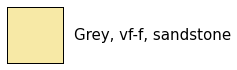

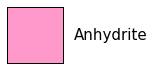

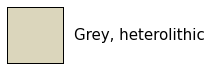

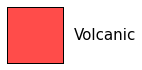

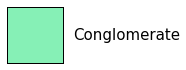

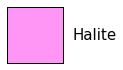

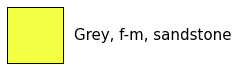

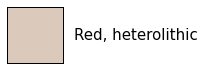

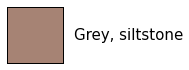

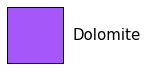

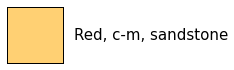

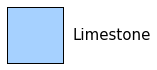

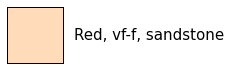

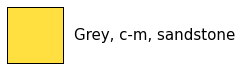

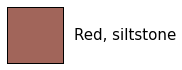

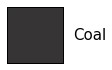

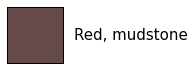

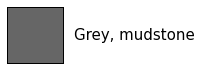

In [18]:
legend.plot()

Sometimes you don't want to have to make a legend, so you can use a random one. Just pass a list of `Component`s...

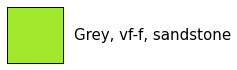

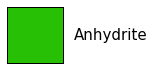

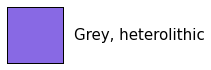

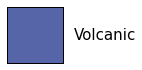

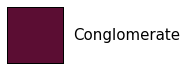

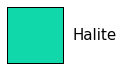

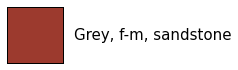

In [20]:
# We'll scrape a quick list of 7 components from the default legend:
c = [d.component for d in legend[:7]]

l = Legend.random(c)
l.plot()

<hr />

<p style="color:gray">©2015 Agile Geoscience. Licensed CC-BY. <a href="https://github.com/agile-geoscience/striplog">striplog.py</a></p>